## Equations

Construct the equations for the right side of the system.

### Setting up

In [80]:
from sympy import *

# Option for printing pretty equations
init_printing(use_unicode=True)


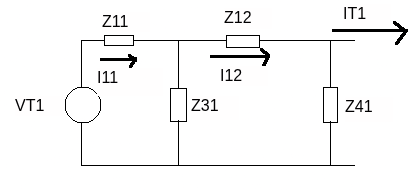
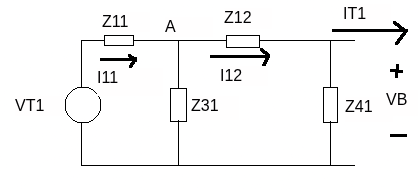
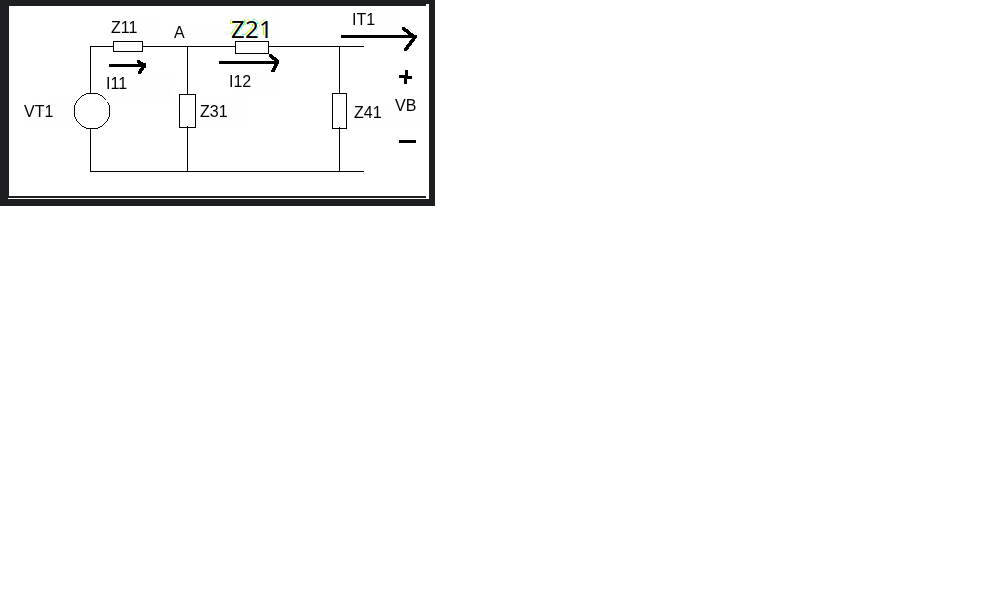
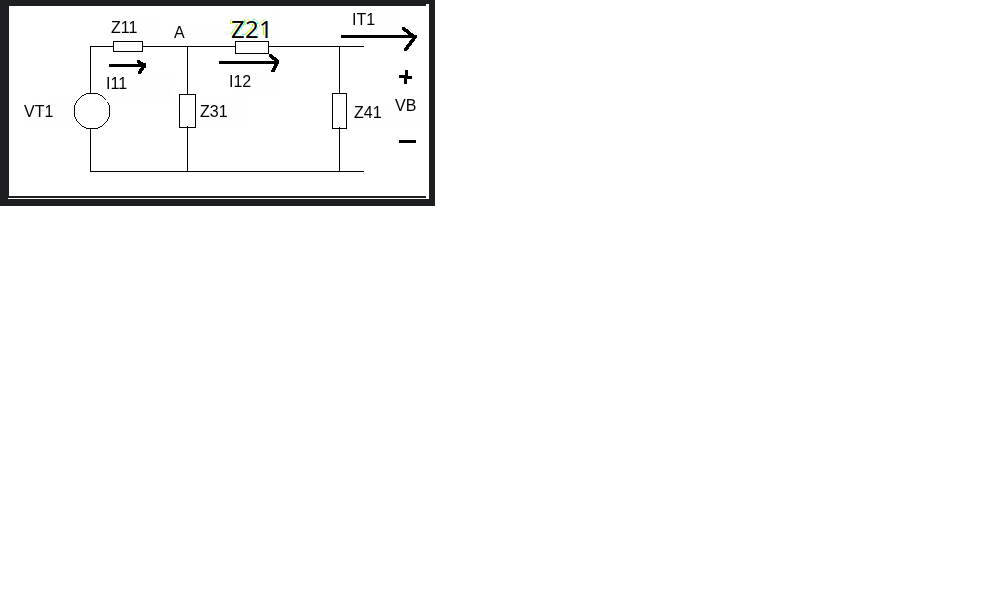
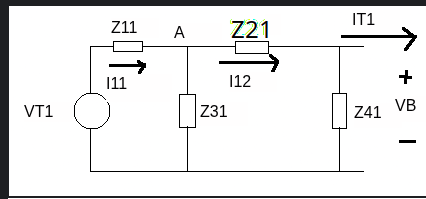

In [81]:
V_T1, V_A1, I11, Z11 = symbols('V_T1 V_A1 I11 Z11')

# Initial expression for V_B
eqVA1 = Eq(V_A1, V_T1 - I11 * Z11)
eqVA1

$V_B$ is expressed as $V_A$ minus the voltage drop over $Z_{12}$. The current $I_{12}$ is $I_{11}$ minus what runs through $Z_{31}$

In [82]:
Z31, V_B1, I21, Z21 = symbols('Z31 V_B1 I21 Z21')
eqVB1 = Eq(V_B1, V_A1 - I21 * Z21)
eqVB1

In [83]:
I21 = I11 - V_A1 / Z31
eqVB1 = eqVB1.subs('I21', I21)
eqVB1

$I_{11}$ is expressed from the power contraint

In [84]:
P1 = symbols('P1')
eqI11 = Eq(I11, P1 / V_T1)
eqI11


$V_{A1}$ and $I_{11}$ has been expressed previously, and can readily be substituted

In [85]:
eqVB1 = eqVB1.subs('V_A1', eqVA1.rhs).subs('I11', eqI11.rhs)
eqVB1

In [86]:
print(eqVB1.rhs)

-P1*Z11/V_T1 + V_T1 - Z21*(P1/V_T1 - (-P1*Z11/V_T1 + V_T1)/Z31)


The above is the expression for VB as seen from Turbine 1. The expressions for Turbine 2 is the same, with different dubscripts.

In [87]:
V_B2, P2, Z12, V_T2, Z22, Z32  = symbols('V_B2 P2 Z12 V_T2 Z22 Z32')
eqVB2 = eqVB1.subs([('V_B1',V_B2), ('P1', P2), ('Z11', Z12), ('V_T1', V_T2), ('Z21', Z22), ('Z31', Z32)])
eqVB2

In [88]:
print(eqVB2.rhs)

-P2*Z12/V_T2 + V_T2 - Z22*(P2/V_T2 - (-P2*Z12/V_T2 + V_T2)/Z32)


# POC
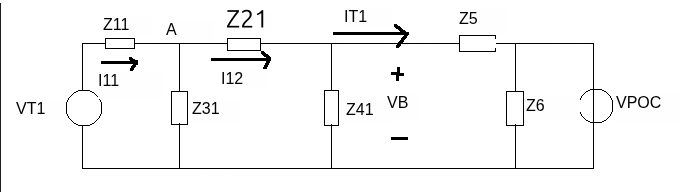

The voltage in $V_B$ as seen from POC is VPOC + the voltage drop over Z5, through which the two currents from each turbine flows. Just one current is drawn in the diagram above, but both are flowing through.
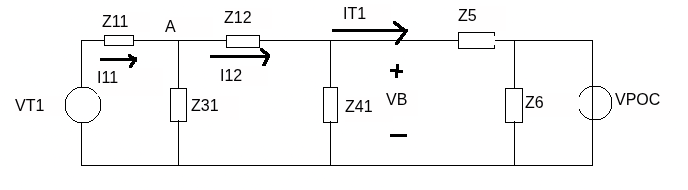

In [89]:
V_POC, Z5, Z6, I_T1, I_T2, V_B, Z41 = symbols('V_POC Z5 Z6 I_T1 I_T2 V_B Z41')

eqVB3 = Eq(V_B, V_POC + (I_T1 + I_T2) * Z5)
eqVB3

The turbine currents are derived, going all the way back to VT1 and VT2

In [90]:
# I21 is substituted instantly since it is in memory from previous cells
eqIT1 = Eq(I_T1, I21 - V_B / Z41)
eqIT1

In [91]:
eqIT1 = eqIT1.subs('V_A1', eqVA1.rhs).subs('I11', eqI11.rhs)
eqIT1

In [92]:
Z42 = symbols('Z42')
eqIT2 = eqIT1.subs([('I_T1', I_T2), ('P1', P2), ('V_T1', V_T2), ('Z41', Z42), ('Z11', Z12), ('Z31', Z32)])
eqIT2

In [93]:
print(eqIT1.rhs)
print(eqIT2.rhs)

P1/V_T1 - V_B/Z41 - (-P1*Z11/V_T1 + V_T1)/Z31
P2/V_T2 - V_B/Z42 - (-P2*Z12/V_T2 + V_T2)/Z32


Knowing the current coming from the turbines, these can be substituted into the expression for $V_B$ as seen from POC.

In [94]:
eqVB3 = eqVB3.subs([('I_T1', eqIT1.rhs), ('I_T2', eqIT2.rhs)])
eqVB3

$V_B$ is on both sides of the equation here. Solving for $V_B$ yields:

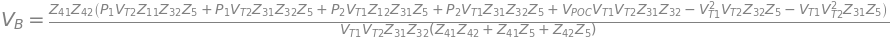

In [95]:
eqVB3 = Eq(V_B, solve(eqVB3, 'V_B')[0])
eqVB3

In [96]:
print(eqVB3.rhs)

Z41*Z42*(P1*V_T2*Z11*Z32*Z5 + P1*V_T2*Z31*Z32*Z5 + P2*V_T1*Z12*Z31*Z5 + P2*V_T1*Z31*Z32*Z5 + V_POC*V_T1*V_T2*Z31*Z32 - V_T1**2*V_T2*Z32*Z5 - V_T1*V_T2**2*Z31*Z5)/(V_T1*V_T2*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5))


# Criteria Equations
The solver needs something it can find roots for. Since VB must be the same for all three equations, subtracting one from any other, should equate 0.

In [97]:
ceq1 = (eqVB1.rhs - eqVB3.rhs).simplify()
print(ceq1)

(-P1*V_T2*Z11*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5) + V_T1**2*V_T2*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5) - V_T2*Z21*Z32*(P1*Z11 + P1*Z31 - V_T1**2)*(Z41*Z42 + Z41*Z5 + Z42*Z5) - Z41*Z42*(P1*V_T2*Z11*Z32*Z5 + P1*V_T2*Z31*Z32*Z5 + P2*V_T1*Z12*Z31*Z5 + P2*V_T1*Z31*Z32*Z5 + V_POC*V_T1*V_T2*Z31*Z32 - V_T1**2*V_T2*Z32*Z5 - V_T1*V_T2**2*Z31*Z5))/(V_T1*V_T2*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5))


In [98]:
ceq2 = (eqVB2.rhs - eqVB3.rhs).simplify()
print(ceq2)

(-P2*V_T1*Z12*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5) + V_T1*V_T2**2*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5) - V_T1*Z22*Z31*(P2*Z12 + P2*Z32 - V_T2**2)*(Z41*Z42 + Z41*Z5 + Z42*Z5) - Z41*Z42*(P1*V_T2*Z11*Z32*Z5 + P1*V_T2*Z31*Z32*Z5 + P2*V_T1*Z12*Z31*Z5 + P2*V_T1*Z31*Z32*Z5 + V_POC*V_T1*V_T2*Z31*Z32 - V_T1**2*V_T2*Z32*Z5 - V_T1*V_T2**2*Z31*Z5))/(V_T1*V_T2*Z31*Z32*(Z41*Z42 + Z41*Z5 + Z42*Z5))
